## Name: {Claire Zhou}
## Section: {02}

# Lab 2: Regularization for Linear Regression Models

To help develop your understanding of the effect of regularization on linear regression models, in this lab we will experiment with regularization by adjusting the level of shrinkage we apply to the model coefficients. We'll look at how the coefficients and the goodness-of-fit (performance) of the model changes as the shrinkage changes. 

## Tools

#### Libraries:

- sklearn: for model training  
- pandas: for data processing  
- plotnine: for visualization

#### Datasets:

I'll suggest a dataset here, but feel free to import some of your own and experiment. **sklearn.datasets** is a good place to start.

- California housing data

## Linear Regression - No Regularization

To start, we will fit a linear regression model without regularization and examine the coefficients and model fit.

In [1]:
# Here are the libraries we will use
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_line, theme_bw, ylab, xlab, geom_bar

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### As usual, load the data and take a look at it

In [2]:
# Load the data and look at the dictionary
housing = fetch_california_housing(as_frame = True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Keep only the features we want for our model

Let's keep everything except Latitude and Longitude to use in our models.

In [3]:
X = housing.data
y = housing.target

X = X.drop(columns = ['Latitude', 'Longitude'])

X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842


---

**1. Split the data into train and test sets**

In [5]:
#your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

<details>
<summary>Solution</summary>
<pre>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
</pre>
</details>

---

**2. Fit a linear regression model without regularization**

In [6]:
# Your code here
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

<details>
<summary>Solution</summary>
<pre>
lm = LinearRegression()
lm.fit(X_train,y_train)
</pre>
</details>

---

**3. Assess the model performance on the training AND the testing set using $R^2$**

In [7]:
# Your code here
print(f"Testing R-squared = {lm.score(X_test,y_test)}")
print(f"Training R-squared = {lm.score(X_train, y_train)}")

Testing R-squared = 0.5318430466906715
Training R-squared = 0.5415281641974294


<details>
<summary>Solution</summary>
<pre>
print(f"Testing R-squared = {lm.score(X_test,y_test)}")
print(f"Training R-squared = {lm.score(X_train, y_train)}")
</pre>
</details>

---

### Looking at the coefficients

We should visualize the coefficients in some way to get an idea of their size so we can then compare them after we fit another model with regularization.

In [8]:
lm_beta = lm.coef_

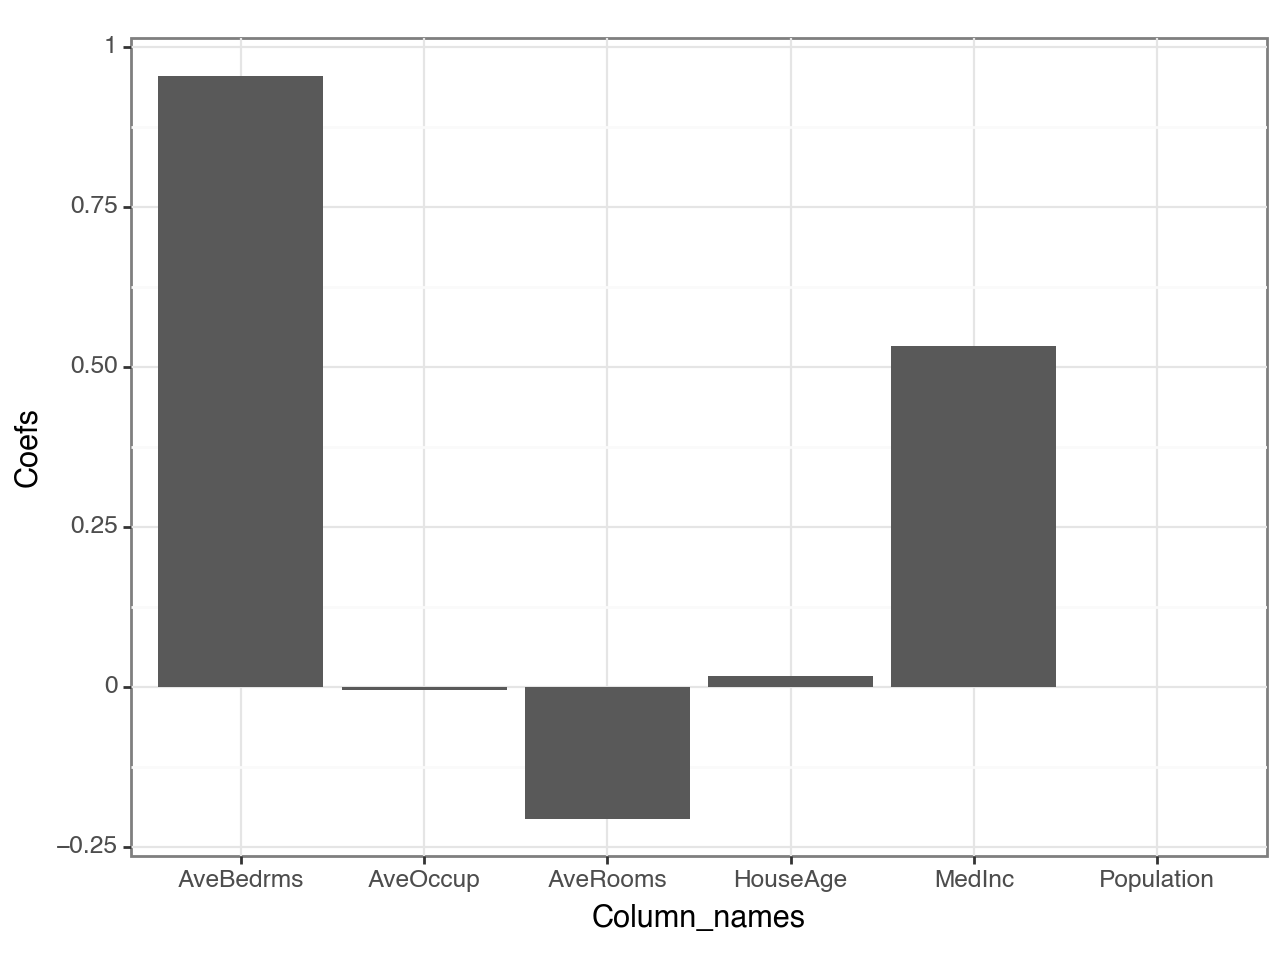

<Figure Size: (640 x 480)>

In [9]:
plot_data = pd.DataFrame({'Column_names':X.columns, 'Coefs':lm_beta})

(
 ggplot(data = plot_data, mapping = aes(x = 'Column_names', y = 'Coefs')) +
    geom_bar(stat = 'identity') +
    theme_bw()
)

## Linear Regression - With Regularization

Now let's add regularization to our model. There are two types of penalties we can add, L1 and L2, that will affect the model coefficients (and performance) differently. There is also a tuning parameter, $\lambda$ that we can tune which will adjust the level of shrinkage to our model. 

First, note that when we fit a regularized linear model, our features must be normalized. Let's do that step manually at first, but note that there are built-in functions to do this for you.

Let's normalize the features by subtracting their mean and dividing by their standard deviation. **Important:** you must use the mean and standard deviation **from the training set** when normalizing your features in both the training and testing set.

In [10]:
# Let's find the mean and standard deviation of all features in the training set
mus = X_train.mean(axis = 0)
sds = X_train.std(axis = 0)

for col in X.columns:
    X_train[col] = (X_train[col] - mus[col])/sds[col]
    X_test[col] = (X_test[col] - mus[col])/sds[col]

Now let's just choose a value for $\lambda$.

In [11]:
lmbda = .1

---

**1. Fit a LASSO model to the training set. Note that in the Lasso function, the shrinkage parameter is called `alpha` and not `lambda`.**

In [12]:
lasso = Lasso(alpha=lmbda, tol=.1) # tol is tolerance for optimization, don't worry about it right now
lasso.fit(X_train, y_train) # your code here

Lasso(alpha=0.1, tol=0.1)

<details>
<summary>Solution</summary>
<pre>
lasso.fit(X_train, y_train)
</pre>
</details>

---

**2. Now look at the scores for the model? How do they compare to the unregularized model you fit above?**

In [13]:
print(f"{lasso.score(X_train, y_train):.2f} R^2 on training set")
print(f"{lasso.score(X_test, y_test):.2f} R^2 on test set")
# Your code here

0.49 R^2 on training set
0.48 R^2 on test set


<details>
<summary>Solution</summary>
<pre>
print(f"{lasso.score(X_train, y_train):.2f} R^2 on training set")
print(f"{lasso.score(X_test, y_test):.2f} R^2 on test set")
</pre>
</details>

### The regularized lasso model has lower R^2 values than the unregularized model.

---

**3. Now look at the coefficients and compare to the unregularized model you fit above. How are they different? Why?**

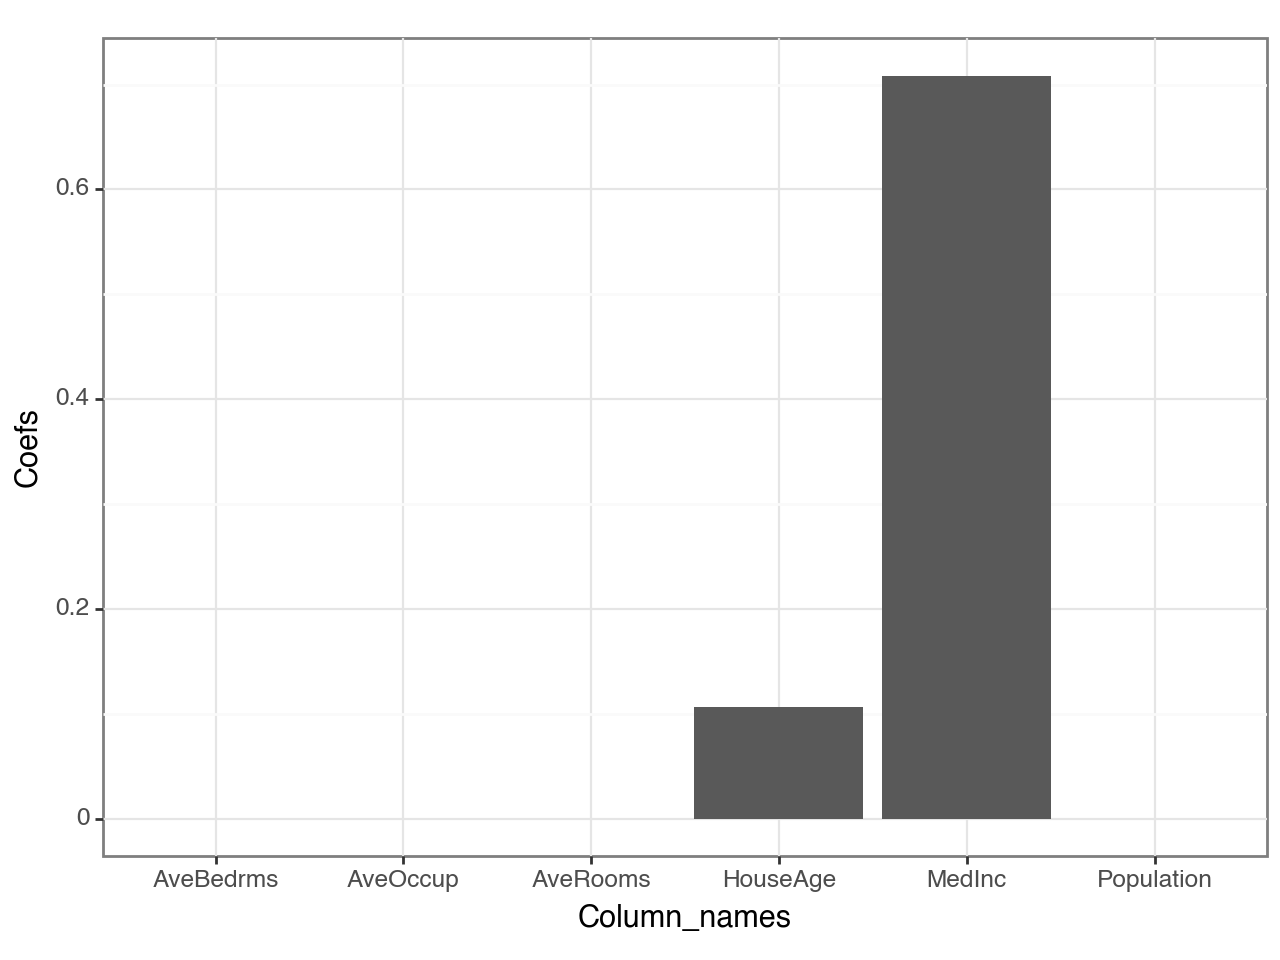

<Figure Size: (640 x 480)>

In [14]:
# Your code here
lasso_beta = lasso.coef_

plot_lasso_data = pd.DataFrame({'Column_names':X.columns, 'Coefs':lasso_beta})


(
 ggplot(data = plot_lasso_data, mapping = aes(x = 'Column_names', y = 'Coefs')) +
    geom_bar(stat = 'identity') +
    theme_bw()
)

<details>
<summary>Solution</summary>
<pre>
lasso_beta = lasso.coef_

plot_lasso_data = pd.DataFrame({'Column_names':X.columns, 'Coefs':lasso_beta})

(
 ggplot(data = plot_lasso_data, mapping = aes(x = 'Column_names', y = 'Coefs')) +
    geom_bar(stat = 'identity') +
    theme_bw()
)
</pre>
</details>

### There are only two varialbes left. The two variables left 'Medinc' and 'HouseAge' have much higher coefficients than the unregularized model.

---

**4. Fit a Ridge model to the training set using the same value of lambda as for your lasso model.**  

In [16]:
# your code here
ridge = Ridge(lmbda, tol=.1) 
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, tol=0.1)

---

**5. Look at the performance and compare to the unregularized model AND the lasso model. How are they different?**  

In [17]:
# your code here
print(f"{ridge.score(X_train, y_train):.2f} R^2 on training set")
print(f"{ridge.score(X_test, y_test):.2f} R^2 on test set")

0.54 R^2 on training set
0.53 R^2 on test set


### The R^2 values are about the same as the unregularized model and improved than the lasso model.

---

**6. Visualize the coefficients and compare to the unregularized model AND the lasso model. How are they different? Why?**

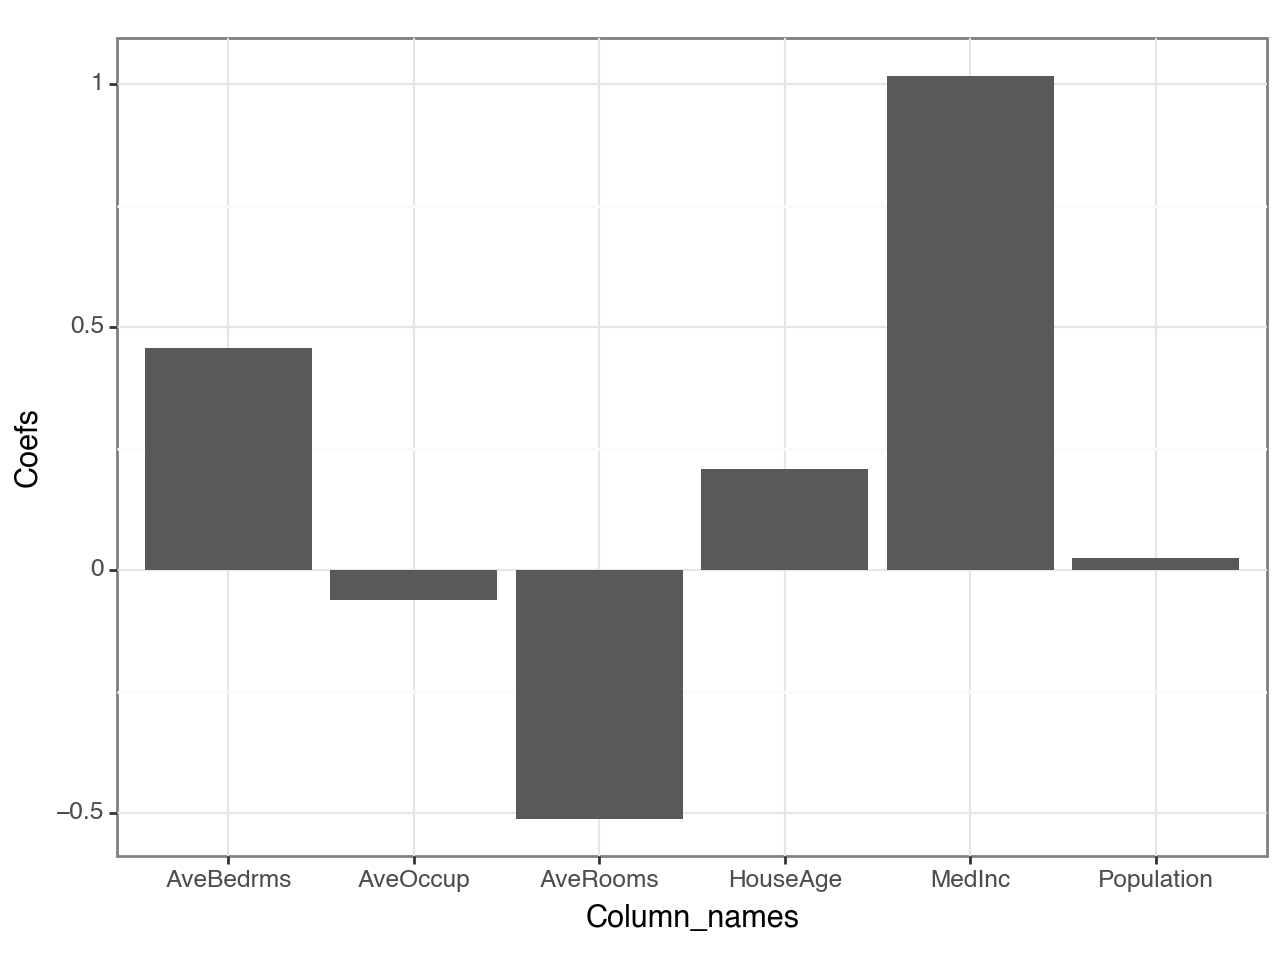

<Figure Size: (640 x 480)>

In [18]:
# your code here
ridge_beta = ridge.coef_

plot_ridge_data = pd.DataFrame({'Column_names':X.columns, 'Coefs':ridge_beta})


(
 ggplot(data = plot_ridge_data, mapping = aes(x = 'Column_names', y = 'Coefs')) +
    geom_bar(stat = 'identity') +
    theme_bw()
)

### The ridge model kept all the variables. The coefficients are about the same for the two variables as for the lasso model. The absolute values of the coefficients are more bigger than the unregularized model for all variables except for 'AveBedrms'.

---

### Effect of $\lambda$ on coefficients and $R^2$

In this section let's see what happens to our lasso model coefficients as we change $\lambda$. We'll need to fit the model multiple times and save the coefficients and $R^2$ from each model run so we can plot them later. A `for` loop, with some numpy arrays might be the easiest way to do this. 

In [20]:
lmbda = [0.001, 0.0025, 0.005, 0.075, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.5]
r2_test = []
r2_train = []
betas = np.empty([len(lmbda), X_train.shape[1]]) 
for i in range(len(lmbda)):
    lasso = Lasso(alpha=lmbda[i], tol=.1)
    lasso.fit(X_train, y_train)
    r2_test.append(lasso.score(X_test, y_test))
    r2_train.append(lasso.score(X_train, y_train))
    betas[i,:] = lasso.coef_

And now that we've saved all of the coefficients, and the $R^2$ values, we can make some dataframes for plotting.

In [21]:
plot_r2_data = pd.DataFrame({'lambda':lmbda, 'r2_test':r2_test, 'r2_train':r2_train})
plot_coef_data = pd.DataFrame(betas, columns = X_train.columns)
plot_coef_data['lambda'] = lmbda
plot_coef_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,lambda
0,1.002564,0.208578,-0.478923,0.427546,0.024903,-0.058808,0.0010
1,0.982553,0.208403,-0.433849,0.386548,0.023830,-0.056650,0.0025
2,0.945540,0.208607,-0.350233,0.310848,0.022321,-0.052966,0.0050
3,0.736777,0.135179,-0.000000,0.000000,0.000000,-0.000000,0.0750
4,0.877485,0.208204,-0.196857,0.171471,0.018849,-0.045738,0.0100
5,0.809692,0.196783,-0.048618,0.029975,0.006253,-0.032832,0.0200
6,0.793681,0.184594,-0.026065,0.000000,0.000000,-0.021894,0.0300
7,0.778333,0.174358,-0.012433,0.000000,0.000000,-0.011277,0.0400
8,0.765022,0.163461,-0.000000,0.000000,0.000000,-0.000711,0.0500
9,0.736777,0.135179,-0.000000,0.000000,0.000000,-0.000000,0.0750


---

**1. Visualize the $R^2$ values for the different values of $\lambda$ for the training and testing sets.**

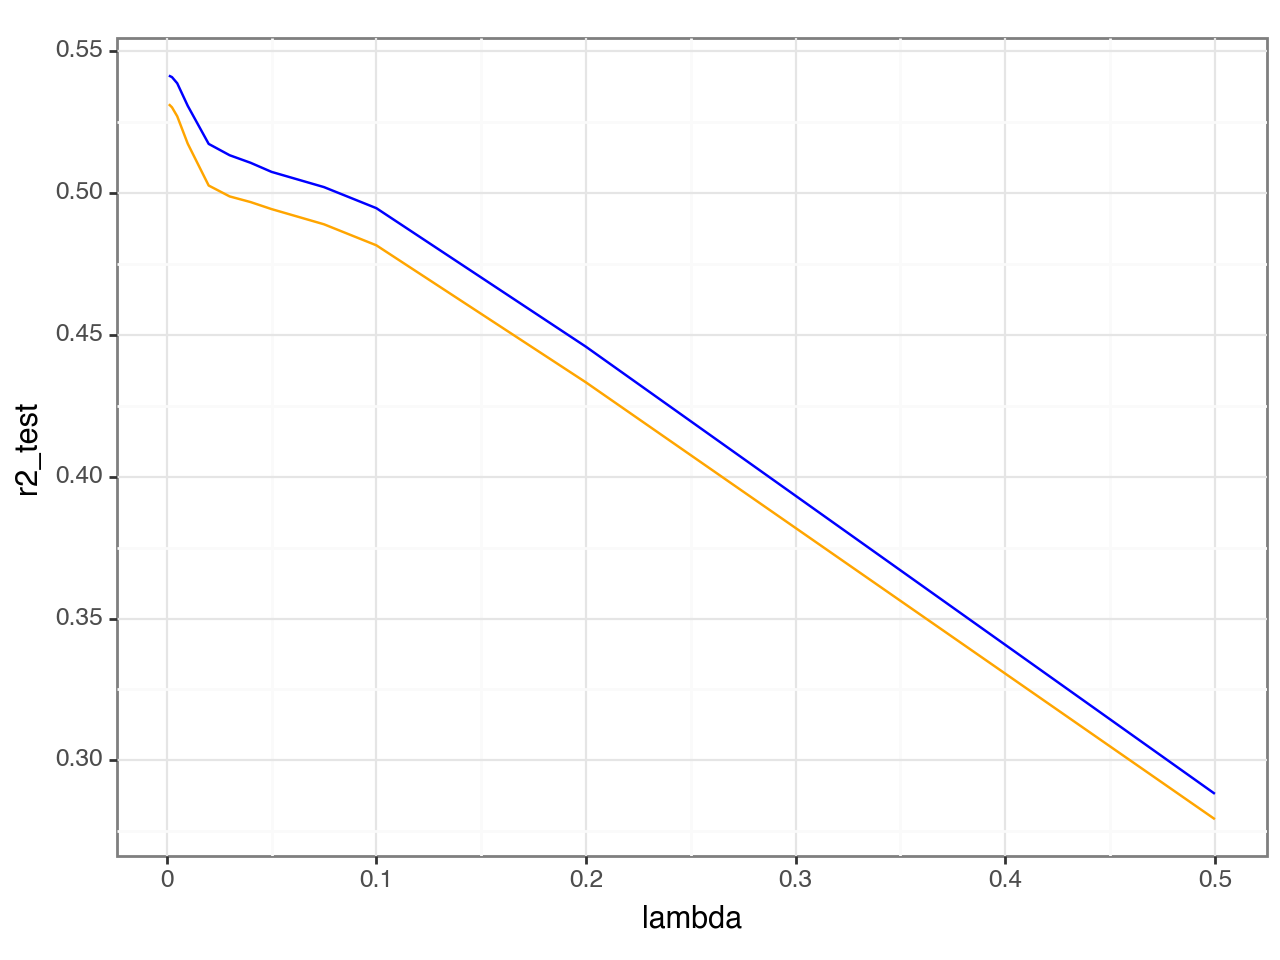

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(data = plot_r2_data, mapping = aes(x = 'lambda', y = 'r2_test')) +
    geom_line(color = 'orange') +
    geom_line(mapping = aes(x = 'lambda', y = 'r2_train'), color = 'blue') + 
    theme_bw()
)

---

**2. Visualize the change in the coefficients for different values of $\lambda$**

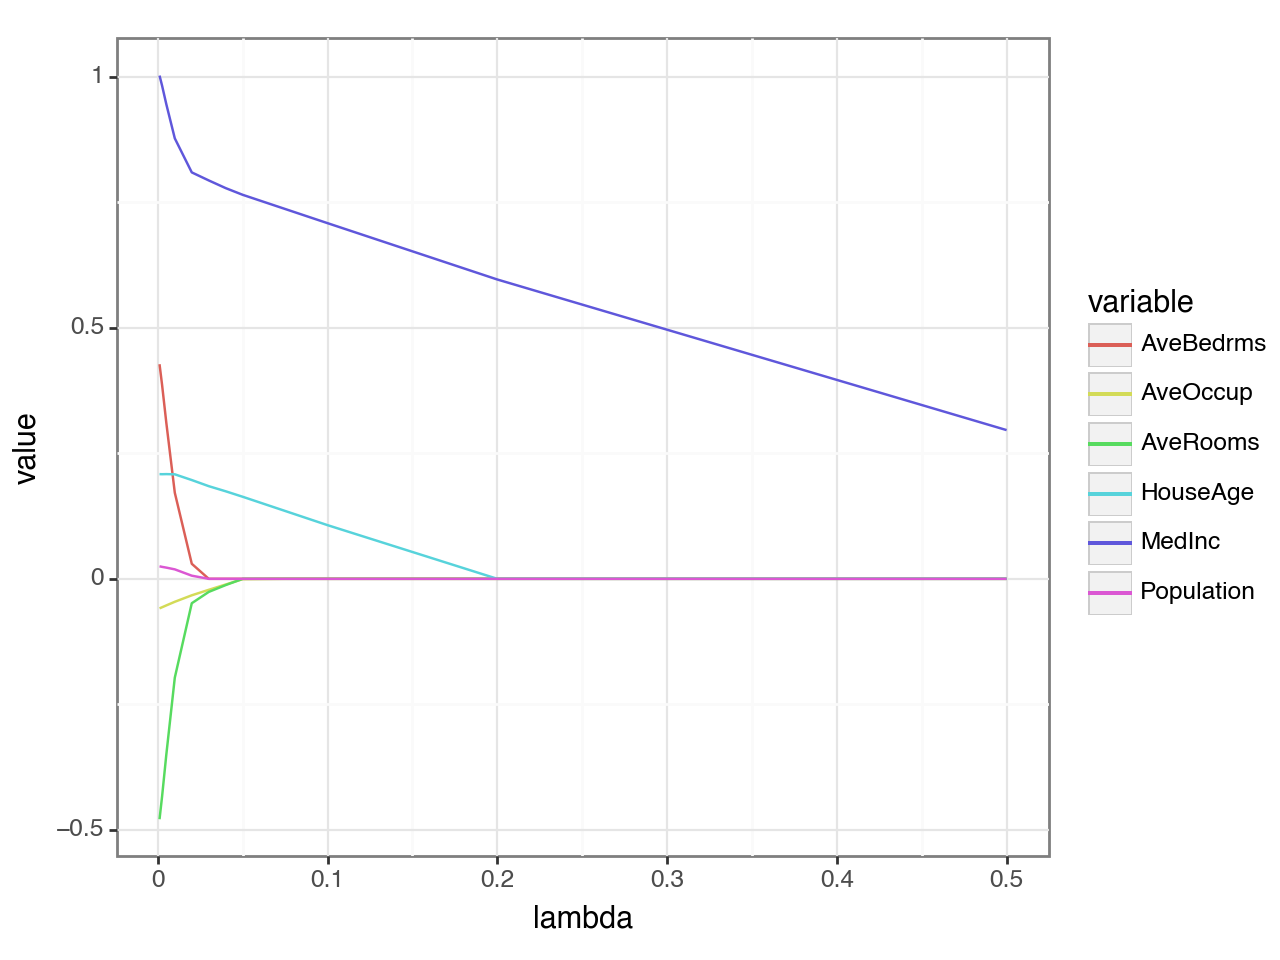

<Figure Size: (640 x 480)>

In [23]:
# Let's melt the plot_coef_data dataframe so that we can put them all on the same plot easily
plot_coef_data = plot_coef_data.melt(id_vars = 'lambda')

(
    ggplot(data = plot_coef_data, mapping = aes(x = 'lambda', y = 'value', color = 'variable')) +
    geom_line() +
    theme_bw()
)

Re-run the above with different training and test sets (if your code works you can just go to Run -> Run All Cells). You'll notice that sometimes the $R^2$ is overall better, sometimes it's lower, but usually it's in the same ballpark. You should also notice that sometimes the testing set performance is better than the training set, and sometimes it's worse, even though you might expect regularization to always reduce overfitting and improve testing set performance. 

This is the beauty of working with real data. Not only is there randomness involved in the way you split your training and testing sets, which affects the outcome, but there may be features included in the model that should not be there.

### Let's do the same as above, but for Ridge regression instead

**1. Now do the same as above, but for ridge regression. You might need to try much larger or much smaller values of $\lambda$.**

**2. Re-run it a few times. See what changes, see what doesn't.**

**3. Try *different* values of $\lambda$ and see how that changes the outcomes.**

In [40]:
# You can copy and paste a bunch of what is above and change what you need
lmbda = [0.0001, 0.001, 0.0025, 0.005, 0.075, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.2, 0.5, 1, 5, 10, 100, 200, 300, 400, 500]
r2_test = []
r2_train = []
betas = np.empty([len(lmbda), X_train.shape[1]]) 
for i in range(len(lmbda)):
    ridge = Ridge(alpha=lmbda[i], tol=.1)
    ridge.fit(X_train, y_train)
    r2_test.append(ridge.score(X_test, y_test))
    r2_train.append(ridge.score(X_train, y_train))
    betas[i,:] = ridge.coef_

In [41]:
plot_r2_data = pd.DataFrame({'lambda':lmbda, 'r2_test':r2_test, 'r2_train':r2_train})
plot_coef_data = pd.DataFrame(betas, columns = X_train.columns)
plot_coef_data['lambda'] = lmbda
plot_coef_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,lambda
0,1.017207,0.208518,-0.511994,0.457500,0.025519,-0.060278,0.0001
1,1.017207,0.208518,-0.511993,0.457499,0.025519,-0.060278,0.0010
2,1.017207,0.208518,-0.511992,0.457499,0.025519,-0.060278,0.0025
3,1.017206,0.208518,-0.511991,0.457497,0.025519,-0.060278,0.0050
4,1.017186,0.208519,-0.511951,0.457460,0.025519,-0.060277,0.0750
5,1.017205,0.208518,-0.511988,0.457495,0.025519,-0.060278,0.0100
6,1.017202,0.208518,-0.511982,0.457489,0.025519,-0.060278,0.0200
7,1.017199,0.208519,-0.511976,0.457484,0.025519,-0.060278,0.0300
8,1.017196,0.208519,-0.511971,0.457479,0.025519,-0.060278,0.0400
9,1.017193,0.208519,-0.511965,0.457473,0.025519,-0.060277,0.0500


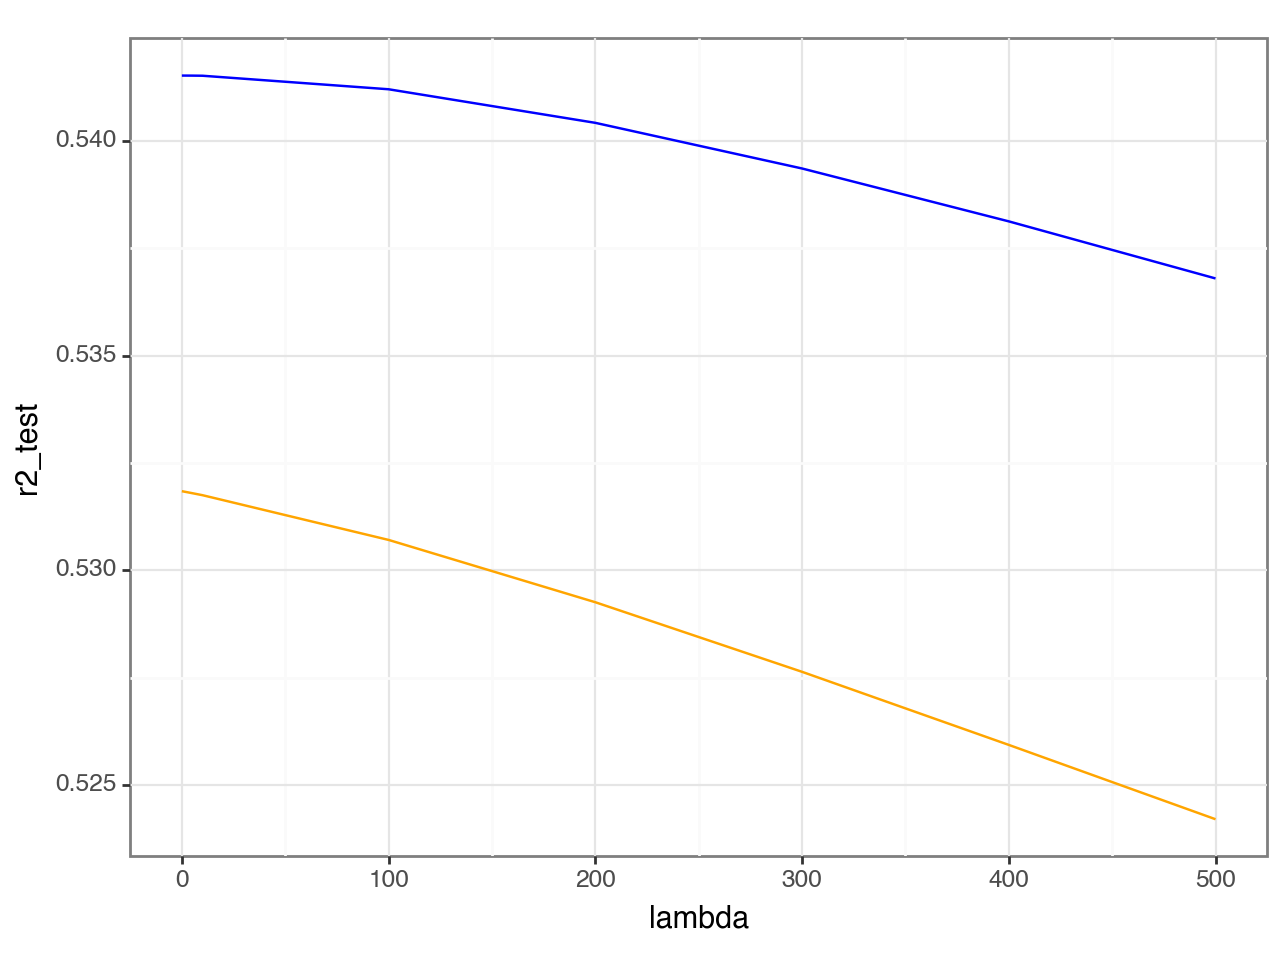

<Figure Size: (640 x 480)>

In [42]:
(
    ggplot(data = plot_r2_data, mapping = aes(x = 'lambda', y = 'r2_test')) +
    geom_line(color = 'orange') +
    geom_line(mapping = aes(x = 'lambda', y = 'r2_train'), color = 'blue') + 
    theme_bw()
)

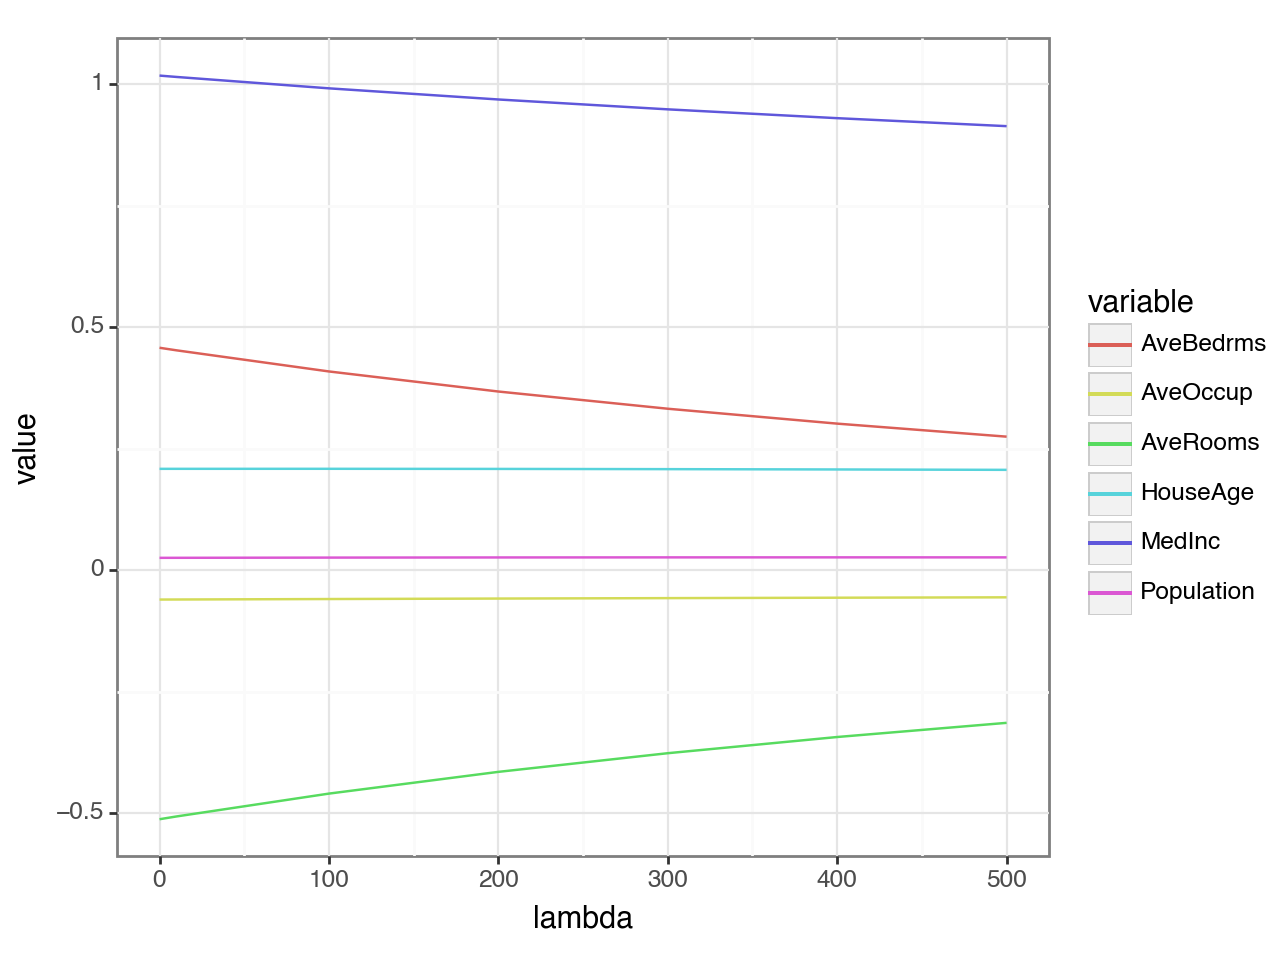

<Figure Size: (640 x 480)>

In [43]:
plot_coef_data = plot_coef_data.melt(id_vars = 'lambda')

(
    ggplot(data = plot_coef_data, mapping = aes(x = 'lambda', y = 'value', color = 'variable')) +
    geom_line() +
    theme_bw()
)